<a href="https://colab.research.google.com/github/MoniaGierszewska/Kurs-Data-Science/blob/main/Kopia_Projekt_koncowy_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_excel("poglowie.xlsx", sheet_name="TABLICA")

In [5]:
df.columns = ["Kod", "Nazwa", "Poglowie_bydla"]
df

,Kod,Nazwa,Poglowie_bydla
0,NaN,NaN,pogłowie zwierząt
1,NaN,NaN,bydło ogółem
2,NaN,NaN,2020
3,NaN,NaN,[szt.]
4,201000.0,Powiat bolesławiecki,1645
...,...,...,...
377,3217000.0,Powiat wałecki,1481
378,3218000.0,Powiat łobeski,2081
379,3261000.0,Powiat m. Koszalin,104
380,3262000.0,Powiat m. Szczecin,265


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Kod             378 non-null    float64
 1   Nazwa           378 non-null    object 
 2   Poglowie_bydla  382 non-null    object 
dtypes: float64(1), object(2)
memory usage: 9.1+ KB


In [7]:
df = df.dropna().reset_index().drop('index', axis=1).drop_duplicates(subset='Kod')

In [8]:
df['Poglowie_bydla'] = df['Poglowie_bydla'].astype('int64')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378 entries, 0 to 377
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Kod             378 non-null    float64
 1   Nazwa           378 non-null    object 
 2   Poglowie_bydla  378 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 11.8+ KB


In [10]:
df.head()

,Kod,Nazwa,Poglowie_bydla
0,201000.0,Powiat bolesławiecki,1645
1,202000.0,Powiat dzierżoniowski,3050
2,203000.0,Powiat głogowski,2382
3,204000.0,Powiat górowski,7378
4,205000.0,Powiat jaworski,2019


In [11]:
df['Kod'].unique()

array([ 201000.,  202000.,  203000.,  204000.,  205000.,  206000.,
        207000.,  208000.,  209000.,  210000.,  211000.,  212000.,
        213000.,  214000.,  215000.,  216000.,  217000.,  218000.,
        219000.,  220000.,  221000.,  222000.,  223000.,  224000.,
        225000.,  226000.,  261000.,  262000.,  264000.,  265000.,
        401000.,  402000.,  403000.,  404000.,  405000.,  406000.,
        407000.,  408000.,  409000.,  410000.,  411000.,  412000.,
        413000.,  414000.,  415000.,  416000.,  417000.,  418000.,
        419000.,  461000.,  462000.,  463000.,  464000.,  601000.,
        602000.,  603000.,  604000.,  605000.,  606000.,  607000.,
        608000.,  609000.,  610000.,  611000.,  612000.,  613000.,
        614000.,  615000.,  616000.,  617000.,  618000.,  619000.,
        620000.,  661000.,  662000.,  663000.,  664000.,  801000.,
        802000.,  803000.,  804000.,  805000.,  806000.,  807000.,
        808000.,  809000.,  810000.,  811000.,  812000.,  8610

In [12]:
len(df['Kod'].unique())

378

In [13]:
df['Nazwa'].unique()

array(['Powiat bolesławiecki', 'Powiat dzierżoniowski',
       'Powiat głogowski', 'Powiat górowski', 'Powiat jaworski',
       'Powiat karkonoski', 'Powiat kamiennogórski', 'Powiat kłodzki',
       'Powiat legnicki', 'Powiat lubański', 'Powiat lubiński',
       'Powiat lwówecki', 'Powiat milicki', 'Powiat oleśnicki',
       'Powiat oławski', 'Powiat polkowicki', 'Powiat strzeliński',
       'Powiat średzki', 'Powiat świdnicki', 'Powiat trzebnicki',
       'Powiat wałbrzyski', 'Powiat wołowski', 'Powiat wrocławski',
       'Powiat ząbkowicki', 'Powiat zgorzelecki', 'Powiat złotoryjski',
       'Powiat m. Jelenia Góra', 'Powiat m. Legnica', 'Powiat m. Wrocław',
       'Powiat m. Wałbrzych od 2013', 'Powiat aleksandrowski',
       'Powiat brodnicki', 'Powiat bydgoski', 'Powiat chełmiński',
       'Powiat golubsko-dobrzyński', 'Powiat grudziądzki',
       'Powiat inowrocławski', 'Powiat lipnowski', 'Powiat mogileński',
       'Powiat nakielski', 'Powiat radziejowski', 'Powiat rypiński',
 

In [14]:
len(df['Nazwa'].unique())

368

In [15]:
df['Nazwa'].value_counts()

Powiat opolski           2
Powiat bielski           2
Powiat grodziski         2
Powiat tomaszowski       2
Powiat krośnieński       2
                        ..
Powiat olkuski           1
Powiat nowotarski        1
Powiat nowosądecki       1
Powiat myślenicki        1
Powiat m. Świnoujście    1
Name: Nazwa, Length: 368, dtype: int64

In [16]:
df.where(df['Nazwa'] == 'Powiat opolski').dropna()

,Kod,Nazwa,Poglowie_bydla
64,612000.0,Powiat opolski,1153.0
187,1609000.0,Powiat opolski,12292.0


In [17]:
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

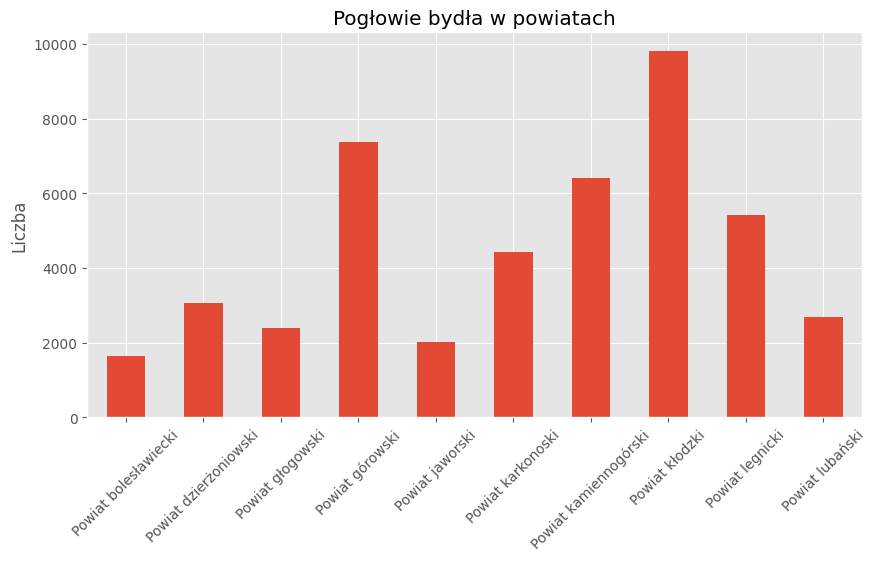

In [99]:
fig = plt.figure(figsize=(10,5), dpi=100)
ax = df["Poglowie_bydla"].head(10).plot(kind="bar", title="Pogłowie bydła w powiatach")
ax.set_ylabel("Liczba")


powiaty = ['Powiat bolesławiecki', 'Powiat dzierżoniowski',
       'Powiat głogowski', 'Powiat górowski', 'Powiat jaworski',
       'Powiat karkonoski', 'Powiat kamiennogórski', 'Powiat kłodzki',
       'Powiat legnicki', 'Powiat lubański']
ax.set_xticklabels(powiaty, rotation= 45);

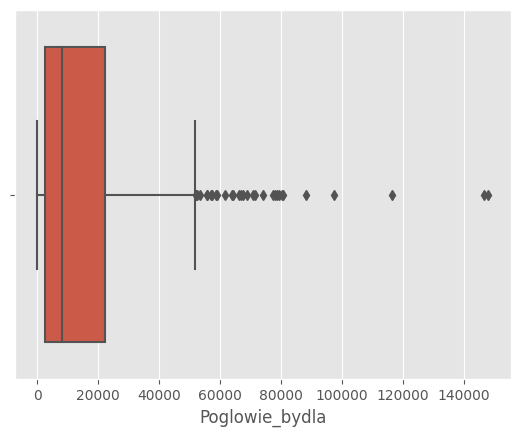

In [100]:
sns.boxplot( x=df["Poglowie_bydla"]);

In [19]:
###########################################################################################

In [20]:
df1 = pd.read_excel("uzytki.xlsx", sheet_name="TABLICA")

In [21]:
df1.columns = ["Kod", "Nazwa", "Uzytki_rolne"]
df1

,Kod,Nazwa,Uzytki_rolne
0,NaN,NaN,użytki rolne ogółem
1,NaN,NaN,2020
2,NaN,NaN,[ha]
3,201000.0,Powiat bolesławiecki,14.25
4,202000.0,Powiat dzierżoniowski,19.24
...,...,...,...
378,3217000.0,Powiat wałecki,37.06
379,3218000.0,Powiat łobeski,50.76
380,3261000.0,Powiat m. Koszalin,17.06
381,3262000.0,Powiat m. Szczecin,26.58


In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Kod           380 non-null    float64
 1   Nazwa         380 non-null    object 
 2   Uzytki_rolne  383 non-null    object 
dtypes: float64(1), object(2)
memory usage: 9.1+ KB


In [23]:
df1 = df1.dropna().reset_index().drop('index', axis=1).drop_duplicates(subset='Kod')

In [24]:
df1['Uzytki_rolne'] = df1['Uzytki_rolne'].astype('float64')

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 0 to 379
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Kod           380 non-null    float64
 1   Nazwa         380 non-null    object 
 2   Uzytki_rolne  380 non-null    float64
dtypes: float64(2), object(1)
memory usage: 11.9+ KB


In [26]:
df1['Kod'].unique()

array([ 201000.,  202000.,  203000.,  204000.,  205000.,  206000.,
        207000.,  208000.,  209000.,  210000.,  211000.,  212000.,
        213000.,  214000.,  215000.,  216000.,  217000.,  218000.,
        219000.,  220000.,  221000.,  222000.,  223000.,  224000.,
        225000.,  226000.,  261000.,  262000.,  264000.,  265000.,
        401000.,  402000.,  403000.,  404000.,  405000.,  406000.,
        407000.,  408000.,  409000.,  410000.,  411000.,  412000.,
        413000.,  414000.,  415000.,  416000.,  417000.,  418000.,
        419000.,  461000.,  462000.,  463000.,  464000.,  601000.,
        602000.,  603000.,  604000.,  605000.,  606000.,  607000.,
        608000.,  609000.,  610000.,  611000.,  612000.,  613000.,
        614000.,  615000.,  616000.,  617000.,  618000.,  619000.,
        620000.,  661000.,  662000.,  663000.,  664000.,  801000.,
        802000.,  803000.,  804000.,  805000.,  806000.,  807000.,
        808000.,  809000.,  810000.,  811000.,  812000.,  8610

In [27]:
len(df1['Kod'].unique())

380

In [28]:
df1['Nazwa'].unique()

array(['Powiat bolesławiecki', 'Powiat dzierżoniowski',
       'Powiat głogowski', 'Powiat górowski', 'Powiat jaworski',
       'Powiat karkonoski', 'Powiat kamiennogórski', 'Powiat kłodzki',
       'Powiat legnicki', 'Powiat lubański', 'Powiat lubiński',
       'Powiat lwówecki', 'Powiat milicki', 'Powiat oleśnicki',
       'Powiat oławski', 'Powiat polkowicki', 'Powiat strzeliński',
       'Powiat średzki', 'Powiat świdnicki', 'Powiat trzebnicki',
       'Powiat wałbrzyski', 'Powiat wołowski', 'Powiat wrocławski',
       'Powiat ząbkowicki', 'Powiat zgorzelecki', 'Powiat złotoryjski',
       'Powiat m. Jelenia Góra', 'Powiat m. Legnica', 'Powiat m. Wrocław',
       'Powiat m. Wałbrzych od 2013', 'Powiat aleksandrowski',
       'Powiat brodnicki', 'Powiat bydgoski', 'Powiat chełmiński',
       'Powiat golubsko-dobrzyński', 'Powiat grudziądzki',
       'Powiat inowrocławski', 'Powiat lipnowski', 'Powiat mogileński',
       'Powiat nakielski', 'Powiat radziejowski', 'Powiat rypiński',
 

In [29]:
len(df1['Nazwa'].unique())

370

In [30]:
df1['Nazwa'].value_counts()

Powiat bielski           2
Powiat średzki           2
Powiat nowodworski       2
Powiat ostrowski         2
Powiat opolski           2
                        ..
Powiat oświęcimski       1
Powiat olkuski           1
Powiat nowotarski        1
Powiat nowosądecki       1
Powiat m. Świnoujście    1
Name: Nazwa, Length: 370, dtype: int64

In [31]:
df1.where(df1['Nazwa']=='Powiat bielski').dropna()

,Kod,Nazwa,Uzytki_rolne
218,2003000.0,Powiat bielski,12.58
254,2402000.0,Powiat bielski,6.25


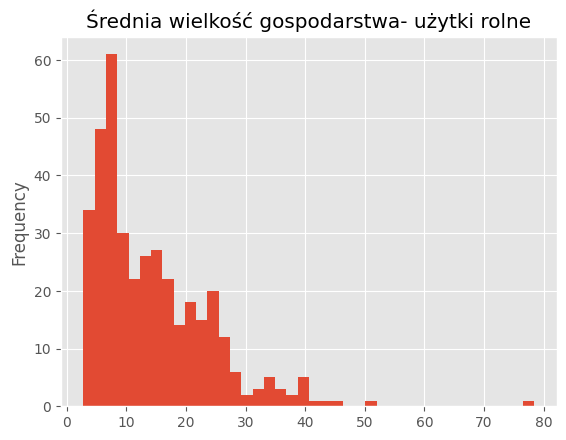

In [32]:
df1["Uzytki_rolne"].plot(kind="hist", bins=40, title= "Średnia wielkość gospodarstwa- użytki rolne");

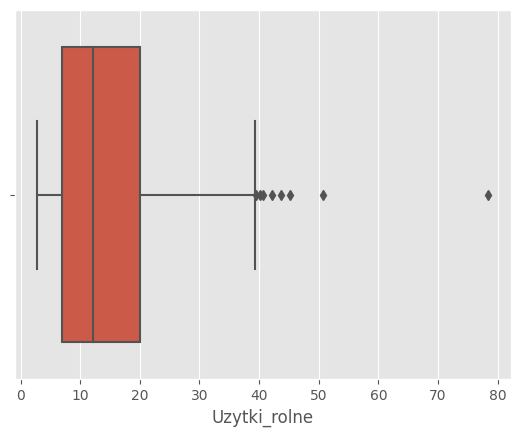

In [107]:
sns.boxplot( x=df1["Uzytki_rolne"]);

In [33]:
###########################################################################################

In [34]:
df2 = pd.read_excel("klasy.xlsx", sheet_name="TABLICA")

In [35]:
df2

,Kod,Nazwa,0-2 tys. euro,2-4 tys. euro,4-8 tys. euro,8-15 tys. euro,15-25 tys. euro,25-50 tys. euro,50-100 tys. euro,100 tys. euro i więcej
0,NaN,NaN,2020,2020,2020,2020,2020,2020,2020,2020
1,NaN,NaN,[gosp.],[gosp.],[gosp.],[gosp.],[gosp.],[gosp.],[gosp.],[gosp.]
2,201000.0,Powiat bolesławiecki,743,479,432,231,119,118,72,78
3,202000.0,Powiat dzierżoniowski,300,273,262,186,126,126,67,52
4,203000.0,Powiat głogowski,258,195,179,144,84,83,76,47
...,...,...,...,...,...,...,...,...,...,...
377,3217000.0,Powiat wałecki,271,147,109,117,105,112,126,113
378,3218000.0,Powiat łobeski,200,99,136,124,91,114,107,112
379,3261000.0,Powiat m. Koszalin,86,41,31,23,16,17,9,8
380,3262000.0,Powiat m. Szczecin,187,63,58,52,41,49,26,27


In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Kod                     380 non-null    float64
 1   Nazwa                   380 non-null    object 
 2   0-2 tys. euro           382 non-null    object 
 3   2-4 tys. euro           382 non-null    object 
 4   4-8 tys. euro           382 non-null    object 
 5   8-15 tys. euro          382 non-null    object 
 6   15-25 tys. euro         382 non-null    object 
 7   25-50 tys. euro         382 non-null    object 
 8   50-100 tys. euro        382 non-null    object 
 9   100 tys. euro i więcej  382 non-null    object 
dtypes: float64(1), object(9)
memory usage: 30.0+ KB


In [37]:
df2 = df2.dropna().reset_index().drop('index', axis =1).drop_duplicates(subset='Kod')

In [38]:
kolumny_do_zmiany = ['0-2 tys. euro', '2-4 tys. euro', '4-8 tys. euro', '8-15 tys. euro',
                     '15-25 tys. euro', '25-50 tys. euro', '50-100 tys. euro', '100 tys. euro i więcej']

df2[kolumny_do_zmiany] = df2[kolumny_do_zmiany].astype('int64')

In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 0 to 379
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Kod                     380 non-null    float64
 1   Nazwa                   380 non-null    object 
 2   0-2 tys. euro           380 non-null    int64  
 3   2-4 tys. euro           380 non-null    int64  
 4   4-8 tys. euro           380 non-null    int64  
 5   8-15 tys. euro          380 non-null    int64  
 6   15-25 tys. euro         380 non-null    int64  
 7   25-50 tys. euro         380 non-null    int64  
 8   50-100 tys. euro        380 non-null    int64  
 9   100 tys. euro i więcej  380 non-null    int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 32.7+ KB


In [40]:
len(df2['Kod'].unique())

380

In [41]:
df2['Nazwa'].unique()

array(['Powiat bolesławiecki', 'Powiat dzierżoniowski',
       'Powiat głogowski', 'Powiat górowski', 'Powiat jaworski',
       'Powiat karkonoski', 'Powiat kamiennogórski', 'Powiat kłodzki',
       'Powiat legnicki', 'Powiat lubański', 'Powiat lubiński',
       'Powiat lwówecki', 'Powiat milicki', 'Powiat oleśnicki',
       'Powiat oławski', 'Powiat polkowicki', 'Powiat strzeliński',
       'Powiat średzki', 'Powiat świdnicki', 'Powiat trzebnicki',
       'Powiat wałbrzyski', 'Powiat wołowski', 'Powiat wrocławski',
       'Powiat ząbkowicki', 'Powiat zgorzelecki', 'Powiat złotoryjski',
       'Powiat m. Jelenia Góra', 'Powiat m. Legnica', 'Powiat m. Wrocław',
       'Powiat m. Wałbrzych od 2013', 'Powiat aleksandrowski',
       'Powiat brodnicki', 'Powiat bydgoski', 'Powiat chełmiński',
       'Powiat golubsko-dobrzyński', 'Powiat grudziądzki',
       'Powiat inowrocławski', 'Powiat lipnowski', 'Powiat mogileński',
       'Powiat nakielski', 'Powiat radziejowski', 'Powiat rypiński',
 

In [42]:
len(df2['Nazwa'].unique())

370

In [43]:
df2['Nazwa'].value_counts()

Powiat bielski           2
Powiat średzki           2
Powiat nowodworski       2
Powiat ostrowski         2
Powiat opolski           2
                        ..
Powiat oświęcimski       1
Powiat olkuski           1
Powiat nowotarski        1
Powiat nowosądecki       1
Powiat m. Świnoujście    1
Name: Nazwa, Length: 370, dtype: int64

In [44]:
df2.where(df2['Nazwa']=='Powiat bielski').dropna()

,Kod,Nazwa,0-2 tys. euro,2-4 tys. euro,4-8 tys. euro,8-15 tys. euro,15-25 tys. euro,25-50 tys. euro,50-100 tys. euro,100 tys. euro i więcej
218,2003000.0,Powiat bielski,1594.0,1244.0,1304.0,849.0,490.0,627.0,459.0,190.0
254,2402000.0,Powiat bielski,970.0,389.0,265.0,184.0,98.0,122.0,71.0,55.0


In [45]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 0 to 379
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Kod                     380 non-null    float64
 1   Nazwa                   380 non-null    object 
 2   0-2 tys. euro           380 non-null    int64  
 3   2-4 tys. euro           380 non-null    int64  
 4   4-8 tys. euro           380 non-null    int64  
 5   8-15 tys. euro          380 non-null    int64  
 6   15-25 tys. euro         380 non-null    int64  
 7   25-50 tys. euro         380 non-null    int64  
 8   50-100 tys. euro        380 non-null    int64  
 9   100 tys. euro i więcej  380 non-null    int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 32.7+ KB


In [74]:
data  = [df2['0-2 tys. euro'].sum(), df2['2-4 tys. euro'].sum(), df2['4-8 tys. euro'].sum(), df2['8-15 tys. euro'].sum(), df2['15-25 tys. euro'].sum(), df2['25-50 tys. euro'].sum(), df2['50-100 tys. euro'].sum(), df2['100 tys. euro i więcej'].sum()]

In [75]:
df_suma_klas = pd.DataFrame(data, columns=['Suma_gospodarstw_wg_klas'])

[375139, 250380, 225105, 158837, 100910, 101930, 61360, 41545]

In [77]:
df_suma_klas

,Suma_gospodarstw_wg_klas
0,375139
1,250380
2,225105
3,158837
4,100910
5,101930
6,61360
7,41545


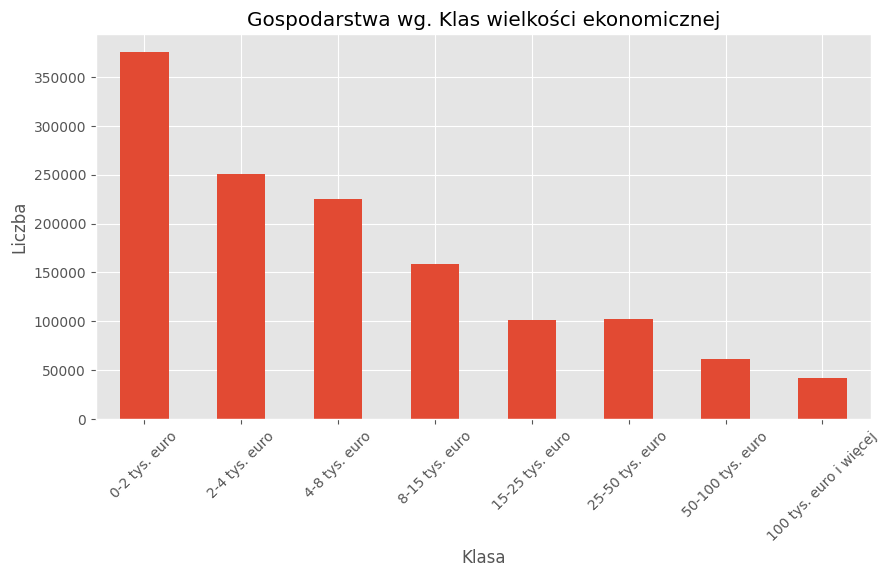

In [78]:
fig = plt.figure(figsize=(10,5), dpi=100)
ax = df_suma_klas["Suma_gospodarstw_wg_klas"].plot(kind="bar", title="Gospodarstwa wg. Klas wielkości ekonomicznej")
ax.set_xlabel("Klasa")
ax.set_ylabel("Liczba")


klasy = ['0-2 tys. euro', '2-4 tys. euro', '4-8 tys. euro', '8-15 tys. euro',
                     '15-25 tys. euro', '25-50 tys. euro', '50-100 tys. euro', '100 tys. euro i więcej']
ax.set_xticklabels(klasy, rotation= 45);

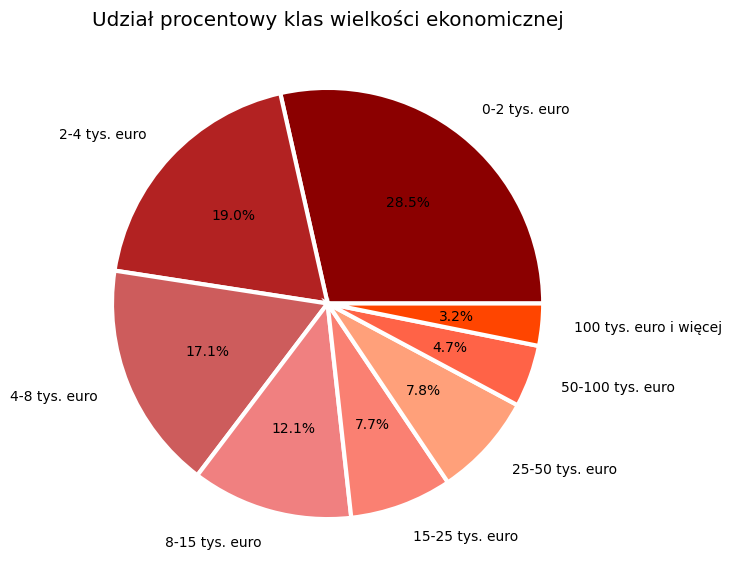

In [119]:
plt.figure(figsize=(10, 7))
colors = ['darkred', 'firebrick', 'indianred', 'lightcoral', 'salmon', 'lightsalmon', 'tomato', 'orangered']
plt.title('Udział procentowy klas wielkości ekonomicznej')
plt.pie(data, labels=klasy, labeldistance=1.15, colors= colors, autopct='%1.1f%%', wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' });

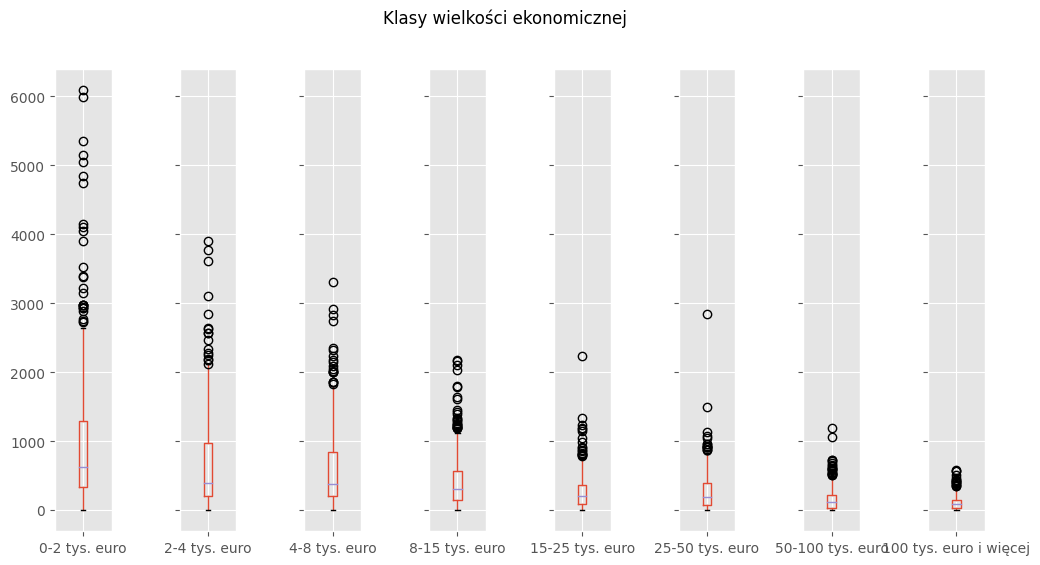

In [101]:
fig, axs = plt.subplots(nrows=1, ncols=8, figsize=(12, 6), sharey=True)

df_new3.boxplot(column='0-2 tys. euro', ax=axs[0])

df_new3.boxplot(column='2-4 tys. euro', ax=axs[1])

df_new3.boxplot(column='4-8 tys. euro', ax=axs[2])

df_new3.boxplot(column='8-15 tys. euro', ax=axs[3])

df_new3.boxplot(column='15-25 tys. euro', ax=axs[4])

df_new3.boxplot(column='25-50 tys. euro', ax=axs[5])

df_new3.boxplot(column='50-100 tys. euro', ax=axs[6])

df_new3.boxplot(column='100 tys. euro i więcej', ax=axs[7])

plt.subplots_adjust(wspace=1.2)

fig.suptitle('Klasy wielkości ekonomicznej')

plt.show()

In [46]:
###########################################################################################

In [47]:
df3 = pd.read_excel("obory.xlsx", sheet_name="TABLICA")

In [48]:
df3.columns = ["Kod", "Nazwa", "Liczba_obor", "Powierzchnia_obor"]
df3

,Kod,Nazwa,Liczba_obor,Powierzchnia_obor
0,NaN,NaN,liczba,powierzchnia lub pojemność
1,NaN,NaN,obory,obory
2,NaN,NaN,2020,2020
3,NaN,NaN,[szt.],[m2]
4,201000.0,Powiat bolesławiecki,53,8868
...,...,...,...,...
374,3217000.0,Powiat wałecki,34,9793
375,3218000.0,Powiat łobeski,61,13524
376,3261000.0,Powiat m. Koszalin,0,0
377,3262000.0,Powiat m. Szczecin,10,2707


In [49]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Kod                375 non-null    float64
 1   Nazwa              375 non-null    object 
 2   Liczba_obor        379 non-null    object 
 3   Powierzchnia_obor  379 non-null    object 
dtypes: float64(1), object(3)
memory usage: 12.0+ KB


In [50]:
df3 = df3.dropna().reset_index().drop('index', axis =1).drop_duplicates(subset='Kod')

In [51]:
kolumny_do_zmiany = ['Liczba_obor', 'Powierzchnia_obor']

df3[kolumny_do_zmiany] = df3[kolumny_do_zmiany].astype('float64')

In [52]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375 entries, 0 to 374
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Kod                375 non-null    float64
 1   Nazwa              375 non-null    object 
 2   Liczba_obor        375 non-null    float64
 3   Powierzchnia_obor  375 non-null    float64
dtypes: float64(3), object(1)
memory usage: 14.6+ KB


In [53]:
df3['Kod'].unique()

array([ 201000.,  202000.,  203000.,  204000.,  205000.,  206000.,
        207000.,  208000.,  209000.,  210000.,  211000.,  212000.,
        213000.,  214000.,  215000.,  216000.,  217000.,  218000.,
        219000.,  220000.,  221000.,  222000.,  223000.,  224000.,
        225000.,  226000.,  261000.,  264000.,  265000.,  401000.,
        402000.,  403000.,  404000.,  405000.,  406000.,  407000.,
        408000.,  409000.,  410000.,  411000.,  412000.,  413000.,
        414000.,  415000.,  416000.,  417000.,  418000.,  419000.,
        461000.,  462000.,  463000.,  464000.,  601000.,  602000.,
        603000.,  604000.,  605000.,  606000.,  607000.,  608000.,
        609000.,  610000.,  611000.,  612000.,  613000.,  614000.,
        615000.,  616000.,  617000.,  618000.,  619000.,  620000.,
        661000.,  662000.,  663000.,  664000.,  801000.,  802000.,
        803000.,  804000.,  805000.,  806000.,  807000.,  808000.,
        809000.,  810000.,  811000.,  812000.,  861000.,  8620

In [54]:
len(df3['Kod'].unique())

375

In [55]:
df3['Nazwa'].unique()

array(['Powiat bolesławiecki', 'Powiat dzierżoniowski',
       'Powiat głogowski', 'Powiat górowski', 'Powiat jaworski',
       'Powiat karkonoski', 'Powiat kamiennogórski', 'Powiat kłodzki',
       'Powiat legnicki', 'Powiat lubański', 'Powiat lubiński',
       'Powiat lwówecki', 'Powiat milicki', 'Powiat oleśnicki',
       'Powiat oławski', 'Powiat polkowicki', 'Powiat strzeliński',
       'Powiat średzki', 'Powiat świdnicki', 'Powiat trzebnicki',
       'Powiat wałbrzyski', 'Powiat wołowski', 'Powiat wrocławski',
       'Powiat ząbkowicki', 'Powiat zgorzelecki', 'Powiat złotoryjski',
       'Powiat m. Jelenia Góra', 'Powiat m. Wrocław',
       'Powiat m. Wałbrzych od 2013', 'Powiat aleksandrowski',
       'Powiat brodnicki', 'Powiat bydgoski', 'Powiat chełmiński',
       'Powiat golubsko-dobrzyński', 'Powiat grudziądzki',
       'Powiat inowrocławski', 'Powiat lipnowski', 'Powiat mogileński',
       'Powiat nakielski', 'Powiat radziejowski', 'Powiat rypiński',
       'Powiat sępoleń

In [56]:
len(df3['Nazwa'].unique())

365

In [57]:
df3['Nazwa'].value_counts()

Powiat opolski           2
Powiat bielski           2
Powiat grodziski         2
Powiat tomaszowski       2
Powiat krośnieński       2
                        ..
Powiat nowotarski        1
Powiat nowosądecki       1
Powiat myślenicki        1
Powiat miechowski        1
Powiat m. Świnoujście    1
Name: Nazwa, Length: 365, dtype: int64

In [58]:
df3.where(df3['Nazwa']=='Powiat bielski').dropna()

,Kod,Nazwa,Liczba_obor,Powierzchnia_obor
216,2003000.0,Powiat bielski,1487.0,402326.0
250,2402000.0,Powiat bielski,236.0,44535.0


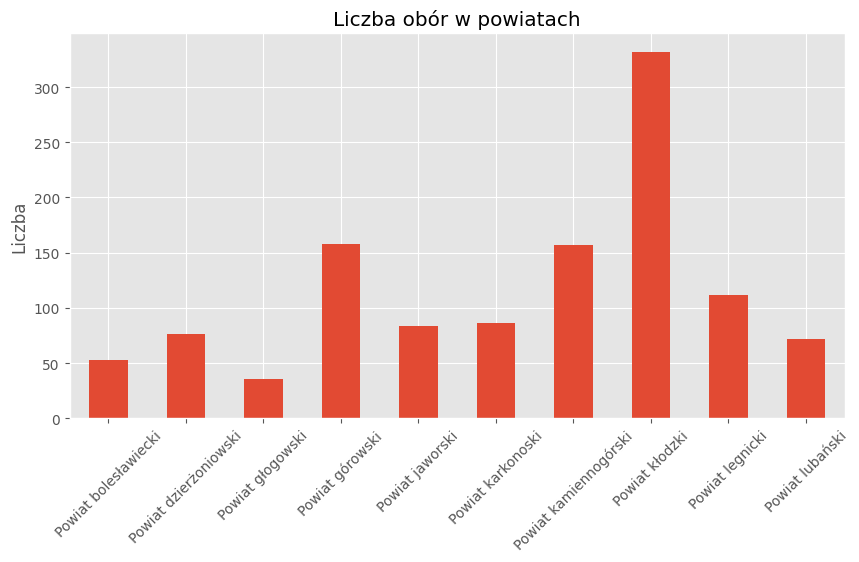

In [59]:
fig = plt.figure(figsize=(10,5), dpi=100)
ax = df3["Liczba_obor"].head(10).plot(kind="bar", title="Liczba obór w powiatach")
ax.set_ylabel("Liczba")


powiaty = ['Powiat bolesławiecki', 'Powiat dzierżoniowski',
       'Powiat głogowski', 'Powiat górowski', 'Powiat jaworski',
       'Powiat karkonoski', 'Powiat kamiennogórski', 'Powiat kłodzki',
       'Powiat legnicki', 'Powiat lubański']
ax.set_xticklabels(powiaty, rotation= 45);

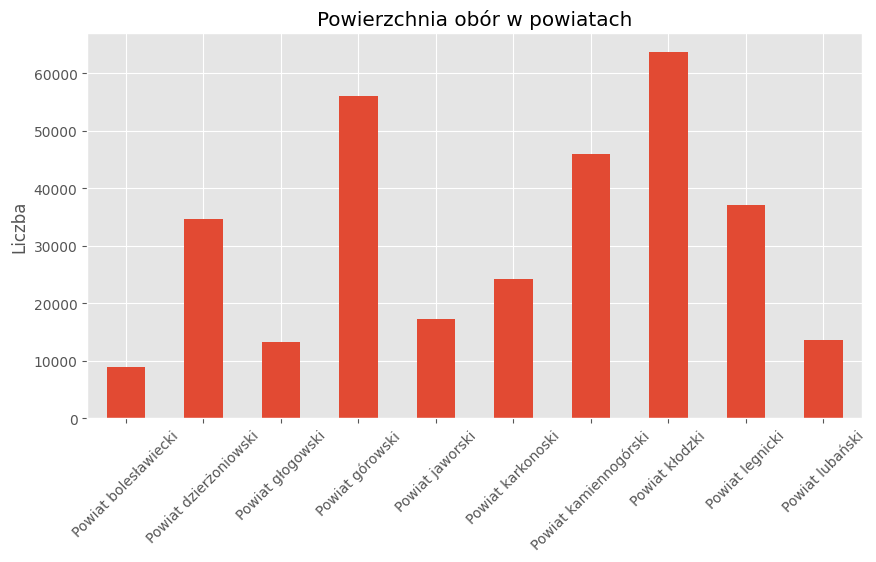

In [60]:
fig = plt.figure(figsize=(10,5), dpi=100)
ax = df3["Powierzchnia_obor"].head(10).plot(kind="bar", title="Powierzchnia obór w powiatach")
ax.set_ylabel("Liczba")


powiaty = ['Powiat bolesławiecki', 'Powiat dzierżoniowski',
       'Powiat głogowski', 'Powiat górowski', 'Powiat jaworski',
       'Powiat karkonoski', 'Powiat kamiennogórski', 'Powiat kłodzki',
       'Powiat legnicki', 'Powiat lubański']
ax.set_xticklabels(powiaty, rotation= 45);

In [61]:
###########################################################################################

In [62]:
df_new1 = pd.merge(df, df1[['Kod','Uzytki_rolne']], on ='Kod')
df_new1

,Kod,Nazwa,Poglowie_bydla,Uzytki_rolne
0,201000.0,Powiat bolesławiecki,1645,14.25
1,202000.0,Powiat dzierżoniowski,3050,19.24
2,203000.0,Powiat głogowski,2382,21.85
3,204000.0,Powiat górowski,7378,19.36
4,205000.0,Powiat jaworski,2019,21.70
...,...,...,...,...
373,3217000.0,Powiat wałecki,1481,37.06
374,3218000.0,Powiat łobeski,2081,50.76
375,3261000.0,Powiat m. Koszalin,104,17.06
376,3262000.0,Powiat m. Szczecin,265,26.58


In [63]:
kolumny_do_merge_df2 = df2.columns.drop(['Nazwa']).tolist()
kolumny_do_merge_df2

['Kod',
 '0-2 tys. euro',
 '2-4 tys. euro',
 '4-8 tys. euro',
 '8-15 tys. euro',
 '15-25 tys. euro',
 '25-50 tys. euro',
 '50-100 tys. euro',
 '100 tys. euro i więcej']

In [64]:
df_new2 = pd.merge(df_new1, df2[kolumny_do_merge_df2], on = 'Kod')
df_new2

,Kod,Nazwa,Poglowie_bydla,Uzytki_rolne,0-2 tys. euro,2-4 tys. euro,4-8 tys. euro,8-15 tys. euro,15-25 tys. euro,25-50 tys. euro,50-100 tys. euro,100 tys. euro i więcej
0,201000.0,Powiat bolesławiecki,1645,14.25,743,479,432,231,119,118,72,78
1,202000.0,Powiat dzierżoniowski,3050,19.24,300,273,262,186,126,126,67,52
2,203000.0,Powiat głogowski,2382,21.85,258,195,179,144,84,83,76,47
3,204000.0,Powiat górowski,7378,19.36,401,281,346,251,155,143,73,76
4,205000.0,Powiat jaworski,2019,21.70,354,289,367,268,157,141,87,57
...,...,...,...,...,...,...,...,...,...,...,...,...
373,3217000.0,Powiat wałecki,1481,37.06,271,147,109,117,105,112,126,113
374,3218000.0,Powiat łobeski,2081,50.76,200,99,136,124,91,114,107,112
375,3261000.0,Powiat m. Koszalin,104,17.06,86,41,31,23,16,17,9,8
376,3262000.0,Powiat m. Szczecin,265,26.58,187,63,58,52,41,49,26,27


In [65]:
kolumny_do_merge_df3 = df3.columns.drop(['Nazwa']).tolist()
kolumny_do_merge_df3

['Kod', 'Liczba_obor', 'Powierzchnia_obor']

In [66]:
df_new3 = pd.merge(df_new2, df3[kolumny_do_merge_df3], on = 'Kod')
df_new3

,Kod,Nazwa,Poglowie_bydla,Uzytki_rolne,0-2 tys. euro,2-4 tys. euro,4-8 tys. euro,8-15 tys. euro,15-25 tys. euro,25-50 tys. euro,50-100 tys. euro,100 tys. euro i więcej,Liczba_obor,Powierzchnia_obor
0,201000.0,Powiat bolesławiecki,1645,14.25,743,479,432,231,119,118,72,78,53.0,8868.0
1,202000.0,Powiat dzierżoniowski,3050,19.24,300,273,262,186,126,126,67,52,76.0,34612.0
2,203000.0,Powiat głogowski,2382,21.85,258,195,179,144,84,83,76,47,36.0,13231.0
3,204000.0,Powiat górowski,7378,19.36,401,281,346,251,155,143,73,76,158.0,56078.0
4,205000.0,Powiat jaworski,2019,21.70,354,289,367,268,157,141,87,57,84.0,17217.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,3217000.0,Powiat wałecki,1481,37.06,271,147,109,117,105,112,126,113,34.0,9793.0
371,3218000.0,Powiat łobeski,2081,50.76,200,99,136,124,91,114,107,112,61.0,13524.0
372,3261000.0,Powiat m. Koszalin,104,17.06,86,41,31,23,16,17,9,8,0.0,0.0
373,3262000.0,Powiat m. Szczecin,265,26.58,187,63,58,52,41,49,26,27,10.0,2707.0


In [67]:
df_new3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375 entries, 0 to 374
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Kod                     375 non-null    float64
 1   Nazwa                   375 non-null    object 
 2   Poglowie_bydla          375 non-null    int64  
 3   Uzytki_rolne            375 non-null    float64
 4   0-2 tys. euro           375 non-null    int64  
 5   2-4 tys. euro           375 non-null    int64  
 6   4-8 tys. euro           375 non-null    int64  
 7   8-15 tys. euro          375 non-null    int64  
 8   15-25 tys. euro         375 non-null    int64  
 9   25-50 tys. euro         375 non-null    int64  
 10  50-100 tys. euro        375 non-null    int64  
 11  100 tys. euro i więcej  375 non-null    int64  
 12  Liczba_obor             375 non-null    float64
 13  Powierzchnia_obor       375 non-null    float64
dtypes: float64(4), int64(9), object(1)
memory 

In [68]:
df.to_excel('df_new3.xlsx', index=True)

In [57]:
df_new3.describe()

,Kod,Poglowie_bydla,Uzytki_rolne,0-2 tys. euro,2-4 tys. euro,4-8 tys. euro,8-15 tys. euro,15-25 tys. euro,25-50 tys. euro,50-100 tys. euro,100 tys. euro i więcej,Liczba_obor,Powierzchnia_obor
count,3.750000e+02,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,3.750000e+02
mean,1.719283e+06,16813.813333,14.353467,999.805333,667.349333,600.114667,423.453333,269.010667,271.784000,163.616000,110.757333,534.856000,1.278479e+05
std,9.437725e+05,21812.923466,9.690619,1035.900996,679.989543,579.307682,396.727357,262.467803,279.413201,173.163663,108.179897,648.098276,1.776466e+05
min,2.010000e+05,0.000000,2.820000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.004500e+06,2693.000000,7.060000,341.000000,202.000000,200.500000,155.000000,90.500000,77.500000,34.500000,26.500000,86.500000,1.845100e+04
50%,1.610000e+06,8155.000000,12.150000,625.000000,389.000000,383.000000,308.000000,206.000000,188.000000,116.000000,86.000000,313.000000,6.113100e+04
75%,2.476000e+06,22399.500000,19.870000,1287.500000,971.000000,842.500000,566.500000,361.000000,392.000000,223.000000,153.500000,705.000000,1.582620e+05
max,3.263000e+06,147973.000000,78.430000,6089.000000,3907.000000,3311.000000,2177.000000,2238.000000,2845.000000,1187.000000,580.000000,4849.000000,1.283916e+06


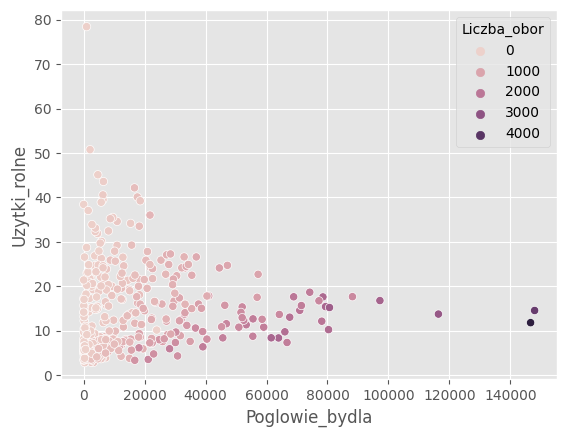

In [115]:
sns.scatterplot(x="Poglowie_bydla",
                y="Uzytki_rolne",
                hue= "Liczba_obor",
                data=df_new3);

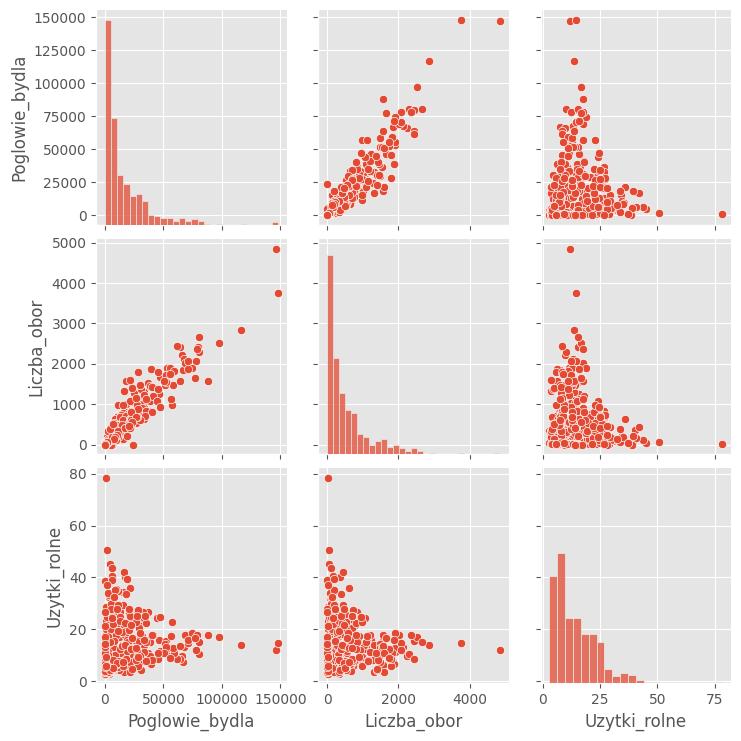

In [103]:
sns.pairplot(data=df_new3,
             vars=["Poglowie_bydla","Liczba_obor", "Uzytki_rolne"]
             )
plt.show()

In [132]:
df_corr =df_new3[["Poglowie_bydla", "Liczba_obor", "Powierzchnia_obor", "Uzytki_rolne", '0-2 tys. euro', '2-4 tys. euro', '4-8 tys. euro', '8-15 tys. euro',
                     '15-25 tys. euro', '25-50 tys. euro', '50-100 tys. euro', '100 tys. euro i więcej']].corr()

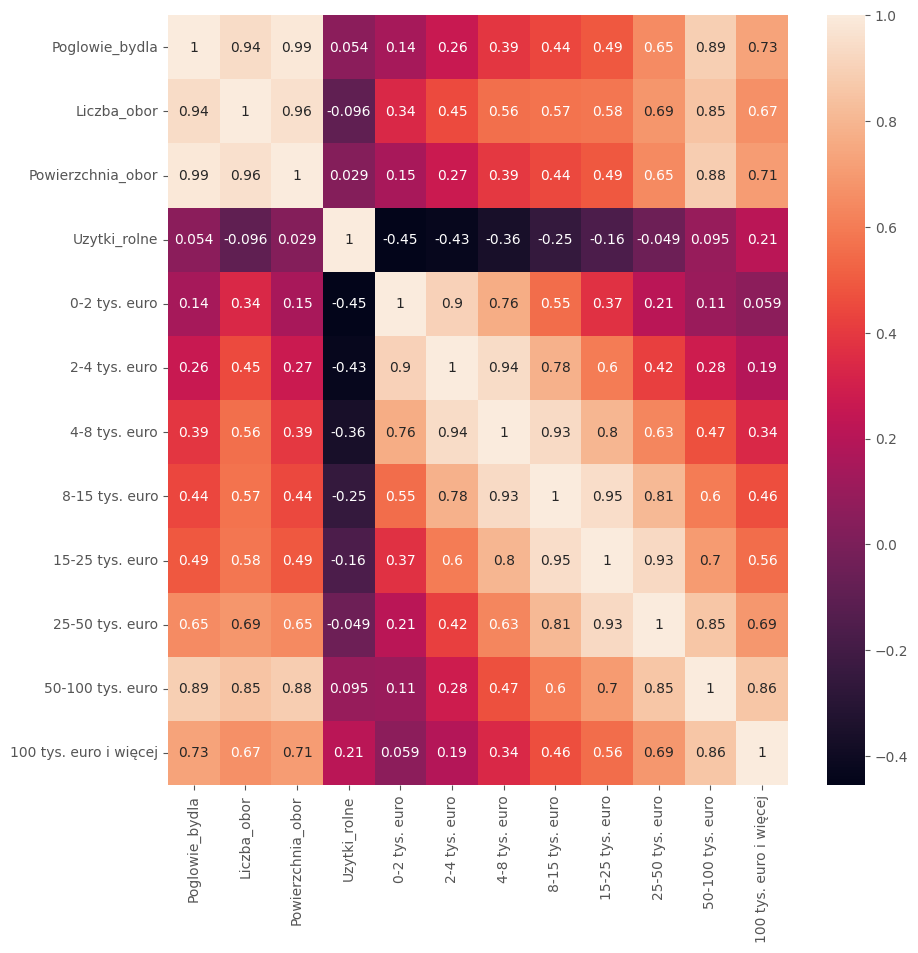

In [133]:
fig = plt.figure(figsize=(10,10), dpi=100)
sns.heatmap(df_corr, annot=True);


In [ ]:
###########################################################################################

In [58]:
X = df_new3.drop(['Kod','Nazwa','Poglowie_bydla'], axis=1)
X

,Uzytki_rolne,0-2 tys. euro,2-4 tys. euro,4-8 tys. euro,8-15 tys. euro,15-25 tys. euro,25-50 tys. euro,50-100 tys. euro,100 tys. euro i więcej,Liczba_obor,Powierzchnia_obor
0,14.25,743,479,432,231,119,118,72,78,53.0,8868.0
1,19.24,300,273,262,186,126,126,67,52,76.0,34612.0
2,21.85,258,195,179,144,84,83,76,47,36.0,13231.0
3,19.36,401,281,346,251,155,143,73,76,158.0,56078.0
4,21.70,354,289,367,268,157,141,87,57,84.0,17217.0
...,...,...,...,...,...,...,...,...,...,...,...
370,37.06,271,147,109,117,105,112,126,113,34.0,9793.0
371,50.76,200,99,136,124,91,114,107,112,61.0,13524.0
372,17.06,86,41,31,23,16,17,9,8,0.0,0.0
373,26.58,187,63,58,52,41,49,26,27,10.0,2707.0


In [59]:
y = df_new3['Poglowie_bydla']
y

0      1645
1      3050
2      2382
3      7378
4      2019
       ... 
370    1481
371    2081
372     104
373     265
374       0
Name: Poglowie_bydla, Length: 375, dtype: int64

In [60]:
from keras import models
from keras import layers
from keras.layers import Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [61]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [62]:
X_scaled

array([[-0.01069126, -0.24823649, -0.27735863, ..., -0.3032088 ,
        -0.74448549, -0.67065111],
       [ 0.50492769, -0.67645487, -0.5807092 , ..., -0.5438703 ,
        -0.70894963, -0.52554057],
       [ 0.77462016, -0.71705346, -0.6955701 , ..., -0.59015136,
        -0.77075112, -0.6460583 ],
       ...,
       [ 0.27966731, -0.88331432, -0.92234674, ..., -0.95114361,
        -0.82637247, -0.72063714],
       [ 1.26337319, -0.78568439, -0.88995008, ..., -0.77527559,
        -0.81092209, -0.70537867],
       [-0.01689108, -0.9326126 , -0.96946916, ..., -1.0251933 ,
        -0.82637247, -0.72063714]])

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,random_state=42, test_size=0.2)

In [64]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(X_scaled.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

In [65]:
model.compile(optimizer='adam',
                loss='mse',
                metrics=['mae'])

In [66]:
model_hist = model.fit(X_train, y_train, epochs=300, batch_size=8)

Epoch 1/300
38/38 [==============================] - 2s 3ms/step - loss: 743300096.0000 - mae: 16597.8652
Epoch 2/300
38/38 [==============================] - 0s 2ms/step - loss: 742896320.0000 - mae: 16590.2637
Epoch 3/300
38/38 [==============================] - 0s 3ms/step - loss: 741585216.0000 - mae: 16569.3535
Epoch 4/300
38/38 [==============================] - 0s 2ms/step - loss: 738227840.0000 - mae: 16520.3574
Epoch 5/300
38/38 [==============================] - 0s 2ms/step - loss: 732253184.0000 - mae: 16432.1992
Epoch 6/300
38/38 [==============================] - 0s 2ms/step - loss: 722212224.0000 - mae: 16294.9463
Epoch 7/300
38/38 [==============================] - 0s 2ms/step - loss: 706685952.0000 - mae: 16098.7979
Epoch 8/300
38/38 [==============================] - 0s 2ms/step - loss: 684248000.0000 - mae: 15842.8213
Epoch 9/300
38/38 [==============================] - 0s 2ms/step - loss: 658142784.0000 - mae: 15503.9385
Epoch 10/300
38/38 [==========================

In [67]:
y_pred = model.predict(X_test)
print(f"R2 score: {r2_score(y_pred, y_test)}")

3/3 [==============================] - 0s 4ms/step
R2 score: 0.9700359922373158


In [68]:
y_pred_train = model.predict(X_train)
print(f"R2 score: {r2_score(y_pred_train, y_train)}")

10/10 [==============================] - 0s 2ms/step
R2 score: 0.9780197313763227


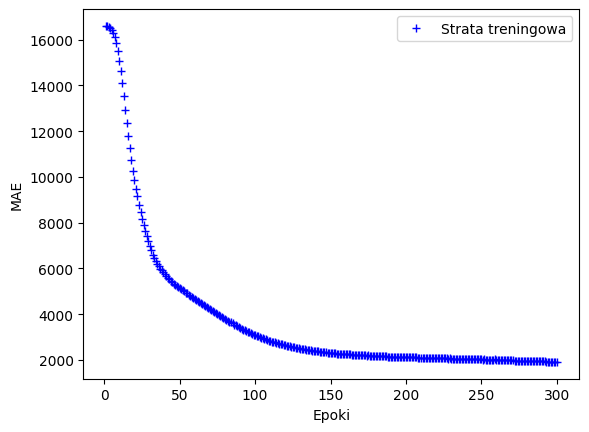

In [69]:
model_val_mae = model_hist.history['mae']
epochs = range(1,301)

plt.plot(epochs, model_hist.history['mae'], 'b+', label='Strata treningowa')

plt.xlabel('Epoki')
plt.ylabel('MAE')
plt.legend()

plt.show()

In [70]:
y_pred_train = model.predict(X_train)
print(f"R2 score: {r2_score(y_pred_train, y_train)}")

10/10 [==============================] - 0s 2ms/step
R2 score: 0.9780197313763227
